
#  <a id=s>Непрерывная оптимизация
<img src='img/opt.gif' width=600>

## <a id=cont>Содержание</a>
- [Градиентный спуск](#1)
- [Градиентный спуск с импульсом](#2)
- [Стохастический градиентный спуск](#3)
- [Метод множителей Лагранжа](#4)


____
## <a id=1>Градиентный спуск</a>

`Градиент` - вектор с началом в данной точке, указывающий наибольшее возрастание значения функции.   
Градиент `ортогонален` линиям, вдоль которых функция сохраняет определеннное значение (`контурным линиям`)

`Градиентный спуск` - оптимизационный алгоритм для нахождения локального минимума функции (функция должна быть дифференцируема).   
При градиентном спуске делаются шаги, `пропорциональные` отрицательному значению, равному по модулю `градиенту` функции в данной точке.\

Значение функции в точке $x_1$ меньше или равно значению функции в исходной точке $x_0$ :

$f(x_1) \leq f(x_0)$, при
- $x_1 = x_0 - \gamma \cdot (\nabla f (x_0))^T$, где
    - $\gamma$ : выбранное некоторое число $\geq 0$, являющееся `шагом` градиентного спуска

___
### _`ПРИМЕР > Градиентный спуск`_

<img src='img/graddesc.jpg' width=500>

_Для функции_ :

$f(\=x) = 0.5 \cdot \=x^T \cdot \begin {bmatrix} 2 & 1 \\ 1 & 20 \end {bmatrix} \cdot \=x - \begin {bmatrix} 5 \\ 3 \end {bmatrix} \cdot \=x$

_С градиентом_ :

$\nabla f(\=x) = \=x^T \cdot \begin {bmatrix} 2 & 1 \\ 1 & 20 \end {bmatrix} - \begin {bmatrix} 5 \\ 3 \end {bmatrix} $

_Минимум функции $f(\=x)$ :_

$min f(\=x) = f(\begin {bmatrix} 2.11 \\ 0.05 \end {bmatrix}) \approx -6.13$

In [82]:
import numpy as np

x_0 = np.array((-3,-1))
f = lambda arr : 0.5 * arr @ np.array(((2,1), (1,20))) @ arr - np.array((5,3)) @ arr
grad = lambda arr : arr @ np.array(((2,1), (1,20))) - np.array((5,3))
gamma = 0.085

def gradient_descend(start_x, grad, gamma):
    next_x = start_x - gamma * grad(start_x)
    return next_x
lst1=[]
for it in range(15):
    lst1.append(f(x_0))
    x_0 = gradient_descend(start_x=x_0,grad=grad, gamma=gamma)
    print(f'Значение функции: {f(x_0):.2f} в текущей точке -> {np.round(x_0,2)}')
print(f'min f(x) = {f(x_0):.2f}')

Значение функции: 22.44 в текущей точке -> [-1.98  1.21]
Значение функции: 11.98 в текущей точке -> [-1.32 -0.42]
Значение функции: 5.58 в текущей точке -> [-0.64  0.66]
Значение функции: 1.55 в текущей точке -> [-0.16 -0.16]
Значение функции: -1.03 в текущей точке -> [0.31 0.38]
Значение функции: -2.72 в текущей точке -> [ 0.65 -0.04]
Значение функции: -3.85 в текущей точке -> [0.97 0.22]
Значение функции: -4.60 в текущей точке -> [1.21 0.02]
Значение функции: -5.12 в текущей точке -> [1.43 0.14]
Значение функции: -5.47 в текущей точке -> [1.6  0.03]
Значение функции: -5.71 в текущей точке -> [1.75 0.09]
Значение функции: -5.88 в текущей точке -> [1.87 0.04]
Значение функции: -5.99 в текущей точке -> [1.97 0.07]
Значение функции: -6.07 в текущей точке -> [2.06 0.04]
Значение функции: -6.13 в текущей точке -> [2.13 0.05]
min f(x) = -6.13


____
`Размер шага` $\gamma$ можно изменять на каждой итерации в зависимости от локальных свойств :
- `Отменить` и `уменьшить` размер шага, если :
    - после шага градиента значение функции `увеличилось`
- `Отменить` и `увеличить` размер шага, если :
    - после шага градиента значение функции `уменьшилось`

____
## <a id=2>Градиентный спуск с импульсом</a>

`Градиентный спуск с импульсом` - метод, который определяет следующее обновление значений как линейную комбинацию текущего и предыдущего градиентов :

$x_{i+1} = x_i - \gamma_i \cdot (\nabla f (x_i))^T + \alpha \cdot \triangle x_i$, где
- $\triangle x_i = x_i - x_{i-1}$
- $\alpha \in [0,1]$ : выбранное некоторое число (`постоянная импульса`) 

Этот метод позволяет `гасить` колебания и позволяет `выходить` из седловых точек с небольшим градиентом.

Больший, по сравнению с градиентным спуском без импульса, `интервал` шага обучения будет находить `минимум` функции.

___
Градиентный спуск `без импульса`

In [101]:
x_0 = np.array((-3,-1))
f = lambda arr : 0.5 * arr @ np.array(((2,1), (1,20))) @ arr - np.array((5,3)) @ arr
grad = lambda arr : arr @ np.array(((2,1), (1,20))) - np.array((5,3))
gamma = 0.095

def gradient_descend(start_x, grad, gamma):
    next_x = start_x - gamma * grad(start_x)
    return next_x
lst1=[]
for it in range(15):
    lst1.append(f(x_0))
    x_0 = gradient_descend(start_x=x_0,grad=grad, gamma=gamma)

Градиентный спуск `с импульсом`

In [102]:
x_0 = np.array((-3,-1))
f = lambda arr : 0.5 * arr @ np.array(((2,1), (1,20))) @ arr - np.array((5,3)) @ arr
grad = lambda arr : arr @ np.array(((2,1), (1,20))) - np.array((5,3))
gamma = 0.095

def gradient_descend(start_x, grad, gamma):
    next_x = start_x - gamma * grad(start_x)
    return next_x

lst2 = []
delta_x = 0
for it in range(15):
    lst2.append(f(x_0))
    prev_x = x_0
    x_0 = gradient_descend(start_x=x_0,grad=grad, gamma=gamma) + 0.1*delta_x
    delta_x = x_0 - prev_x


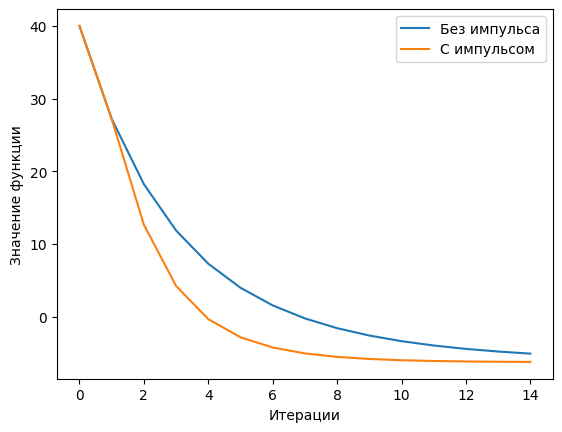

In [108]:
import matplotlib.pyplot as plt

plt.plot(lst1,label='Без импульса')
plt.plot(lst2,label='С импульсом')
plt.xlabel('Итерации')
plt.ylabel('Значение функции')
plt.legend()

____
## <a id=3>Стохастический градиентный спуск</a>

`Стохастический градиентный спуск` (SGD) - метод градиентного спуска, в котором для вычисления градиента на каждой итерации используется `один случайный пример` или небольшая `подвыборка` (батч) :

$\nabla f(x) = \frac{1}{B} \sum \nabla L(x, \Theta_i)$, где :
- $L(x, \Theta_i)$ : градиент функции потерь
- $\Theta_i$ : i-тый пример (подвыборка данных)
- $B$ : кол-во примеров в батче (в классическом смысле 1)

<img src='img/SGD.gif'>

- <a style='color:red'>**Обычный градиентный спуск**</a>
- <a style='color:blue'>**Стохастический градиентный спуск**</a>

____
## <a id=4>Метод множителей Лагранжа</a>

`Метод множителей Лагранжа` - метод нахождения экстремумов функции $f(x)$ в области ограничивающих функций $g_i(x) = 0$

<img src='img/lagrange.png' width=400>

- Составляется `функция Лагранжа` :

    - $L(x, \lambda) = \lambda_0 \cdot f(x) + ... \lambda_i \cdot g_i(x)$

- Составляется и решается `СЛАУ` из
    - частных производных функции $L(x, \lambda)$ по $x_j$ приравненных к нулю
    - ограничивающих функций приравненных к нулю :

    $ \begin {cases} \frac{\partial L}{\partial x_j} = 0 \\
    g_i(x) = 0 \end {cases}$

- Решения СЛАУ $(a)$- экстремальные точки функции $f(x)$ в области ограничивающих функций $g_i(x) = 0$, при $\lambda \neq 0$

- Найденные точки проверяются на экстремльность :
    - $L''(a, \lambda) > 0 $ - точка `минимума`
    - $L''(a, \lambda) < 0 $ - точка `максимума`



___
### _`ПРИМЕР > Метод множителей Лагранжа`_

Найти экстремумы функции :

$f(x,y) = 4x+3y$

<img src='img/lagrex1.gif' width=400>


на множестве, заданном функцией :

$x^2 + y^2 = 1$

<img src='img/lagrex2.gif' width=400>
<img src='img/lagrex3.gif' width=400>

- `Функция Лагранжа` :

    - $\boxed{ L(x, \lambda) = \lambda_0 \cdot f(x) + ... \lambda_i \cdot g_i(x) }$ :
    
        - $ L(x,y, \lambda) = \lambda_0 \cdot (4x + 3y) + \lambda_1 \cdot (x^2 + y^2 - 1)$

- `Частные производные` :
    - $\frac{\partial L}{\partial x} = 4\lambda_0 + 2 \lambda_1x$
    
    - $\frac{\partial L}{\partial y} = 3\lambda_0 + 2 \lambda_1y$

- `СЛАУ` :
    - $ \begin {cases} 4\lambda_0 + 2 \lambda_1x = 0 \\
    3\lambda_0 + 2 \lambda_1y = 0 \\
    x^2 + y^2 - 1 =0 \end {cases}$

- `Возможно 2 случая` :
    - При $\boxed{ \lambda_0 = 0}$
        - $ \begin {cases} 2 \lambda_1x = 0 \\
     2 \lambda_1y = 0 \\
    x^2 + y^2 - 1 =0 \end {cases}$
        - Есть решения только при $\lambda_1 = 0$, следовательно $\lambda = \begin {bmatrix} \lambda_0 \\ \lambda_1 \end {bmatrix} = \begin {bmatrix} 0 \\ 0 \end {bmatrix}$, что значит :
        - `Точек экстремума нет`
    - Либо $\boxed{\lambda_0 \neq 0}$ и  $\lambda_0 $ можно принять равное 1
        - $ \begin {cases} 4 + 2 \lambda_1x = 0 \\
     3 + 2 \lambda_1y = 0 \\
    x^2 + y^2 - 1 =0 \end {cases}$
            - $x = - \frac{2}{\lambda_1}$
            - $y = - \frac{3}{2\lambda_1}$
                - $\frac{4}{\lambda^2_1} + \frac{9}{4\lambda^2_1} = \frac{25}{4\lambda^2_1} = 1$
                    - $\lambda_1 = \pm \frac{5}{2} $
                        - $\boxed{(x,y) = (\frac{4}{5} ; \frac{3}{5})}$
                        - $\boxed{(x,y) = (-\frac{4}{5} ; -\frac{3}{5})}$

- `Максимум` и `минимум`:
    - $f(\frac{4}{5} ; \frac{3}{5}) = 5$ : глобальный `максимум`
    - $f(-\frac{4}{5} ;- \frac{3}{5}) = -5$ : глобальный `минимум`

